> Trying to learn TensorFlow through trial and error. My goal in this notebook is to extract a model which I can use later for object detection. Any help or guidance is always welcome in comments for my little journey towards figuring out this technology.

In [5]:
import os
import pathlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
L = 0
for dirpath, dirnames, filenames in os.walk("video2img\crashedCars"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
    L = L + len(filenames)

There are 2 directories and 0 images in 'video2img\crashedCars'
There are 0 directories and 1273 images in 'video2img\crashedCars\after'
There are 0 directories and 731 images in 'video2img\crashedCars\before'


Image example shape: (720, 1280, 3)


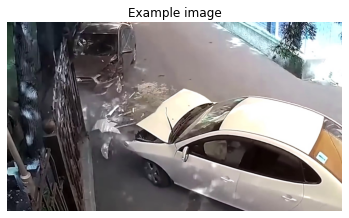

In [7]:
EXAMPLE_IMG_PATH = r"video2img\crashedCars\after\frame1_87.jpg"
img1 = cv2.imread(EXAMPLE_IMG_PATH)
print(f"Image example shape: {img1.shape}")
plt.imshow(img1)
plt.title("Example image")
plt.axis("off")
plt.show()

In [8]:
# Grayscale
def rgb2gray(rgb_img):
    output_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
    return output_img

In [9]:
# Scale to 0 to 1
def scale(image):
    return image / 255

In [10]:
#resize
def resize_img(image, rows=224, cols=224):
    return cv2.resize(image, dsize=(rows, cols), interpolation=cv2.INTER_CUBIC)

In [11]:
# resize the shape
def reshape(image, axis):
    return np.expand_dims(image.mean(axis=axis), axis=1)

In [12]:
# Function to call other Preprocessing Functions
def preprocessed_img(input_img):
    output_img = rgb2gray(input_img)
    output_img = scale(output_img)
    output_img = resize_img(output_img)
    output_img = reshape(output_img, 1)
    return output_img

In [13]:
# Image converted in array
preprocessed_img(img1)

array([[0.53111806],
       [0.56125311],
       [0.55903897],
       [0.5790763 ],
       [0.53793541],
       [0.53910682],
       [0.54527831],
       [0.53001498],
       [0.51948639],
       [0.51484689],
       [0.51307434],
       [0.51464648],
       [0.50460904],
       [0.52121357],
       [0.4885721 ],
       [0.49146042],
       [0.50002059],
       [0.50687157],
       [0.50217067],
       [0.50961994],
       [0.51953325],
       [0.52642048],
       [0.53202941],
       [0.52400735],
       [0.52514267],
       [0.52528291],
       [0.52235167],
       [0.51642427],
       [0.50788684],
       [0.50579603],
       [0.50526497],
       [0.49908903],
       [0.49087331],
       [0.50581137],
       [0.50788769],
       [0.50157888],
       [0.49459759],
       [0.51906302],
       [0.51283908],
       [0.4958947 ],
       [0.50296223],
       [0.50375109],
       [0.50096514],
       [0.49642132],
       [0.49121211],
       [0.4873964 ],
       [0.48799099],
       [0.482

In [14]:
# matrix containing L vectors of shape (224, 1)
mean_vector_matrix = np.zeros(shape=(L, 224, 1))
# Target vector containing the classes for L images
target_vector = np.zeros(shape=(L, 1))

In [15]:
n = 0
for root, dirnames, filenames in os.walk(r"video2img\crashedCars\after"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 1
        if n % 20 == 0:
            print(f"File {n} {filename}")
        n = n + 1  

File 0 frame1_100.jpg
File 20 frame1_33.jpg
File 40 frame1_53.jpg
File 60 frame1_73.jpg
File 80 frame1_93.jpg
File 100 frame2_119.jpg
File 120 frame2_139.jpg
File 140 frame2_159.jpg
File 160 frame2_179.jpg
File 180 frame3_158.jpg
File 200 frame3_178.jpg
File 220 frame3_198.jpg
File 240 frame5_100.jpg
File 260 frame5_120.jpg
File 280 frame5_140.jpg
File 300 frame5_160.jpg
File 320 frame5_180.jpg
File 340 frame5_200.jpg
File 360 frame5_220.jpg
File 380 frame5_240.jpg
File 400 frame5_260.jpg
File 420 frame5_280.jpg
File 440 frame5_300.jpg
File 460 frame5_320.jpg
File 480 frame5_70.jpg
File 500 frame5_90.jpg
File 520 frame6_129.jpg
File 540 frame6_149.jpg
File 560 frame6_169.jpg
File 580 frame7_114.jpg
File 600 frame7_134.jpg
File 620 frame7_154.jpg
File 640 frame7_174.jpg
File 660 frame7_194.jpg
File 680 frame7_82.jpg
File 700 frame8_102.jpg
File 720 frame8_122.jpg
File 740 frame8_142.jpg
File 760 frame8_162.jpg
File 780 frame8_182.jpg
File 800 frame8_202.jpg
File 820 frame8_222.jpg
File 

In [16]:
for root, dirnames, filenames in os.walk(r"video2img\crashedCars\before"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 0
        if n % 20 == 0:
            print(f"File {n} {filename}")
        n = n + 1  

File 1280 frame1_15.jpg
File 1300 frame1_8.jpg
File 1320 frame2_2.jpg
File 1340 frame2_38.jpg
File 1360 frame2_56.jpg
File 1380 frame2_74.jpg
File 1400 frame2_92.jpg
File 1420 frame3_109.jpg
File 1440 frame3_127.jpg
File 1460 frame3_145.jpg
File 1480 frame3_21.jpg
File 1500 frame3_4.jpg
File 1520 frame3_58.jpg
File 1540 frame3_76.jpg
File 1560 frame3_94.jpg
File 1580 frame4_14.jpg
File 1600 frame4_32.jpg
File 1620 frame4_50.jpg
File 1640 frame4_69.jpg
File 1660 frame4_87.jpg
File 1680 frame5_14.jpg
File 1700 frame5_32.jpg
File 1720 frame5_50.jpg
File 1740 frame6_107.jpg
File 1760 frame6_19.jpg
File 1780 frame6_37.jpg
File 1800 frame6_55.jpg
File 1820 frame6_73.jpg
File 1840 frame6_91.jpg
File 1860 frame7_19.jpg
File 1880 frame7_37.jpg
File 1900 frame7_55.jpg
File 1920 frame8_13.jpg
File 1940 frame8_31.jpg
File 1960 frame8_5.jpg
File 1980 frame8_68.jpg
File 2000 frame8_86.jpg


In [17]:

SEED = 0
x_train, x_test, y_train, y_test = train_test_split(mean_vector_matrix, target_vector, test_size=0.2, random_state=SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)
input_shape = x_train.shape
input_shape


(1603, 224, 1)

In [18]:
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=512, activation='relu', input_shape = input_shape),
   tf.keras.layers.Dense(units=512, activation='relu', input_shape = input_shape),
   tf.keras.layers.Dense(units=2, activation='softmax')
])

In [19]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)

In [32]:
history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 20
)

Epoch 1/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9083
Epoch 2/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9189
Epoch 3/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9114
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9002
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9120
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9021
Epoch 7/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9002
Epoch 8/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9139
Epoch 9/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9058
Epoch 10/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9114
Epoch 11/20
51/51 [

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense (Dense)               (None, 512)               115200    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 378,882
Trainable params: 378,882
Non-trainable params: 0
_________________________________________________________________


13/13 - 0s - loss: 0.2312 - accuracy: 0.8953 - 25ms/epoch - 2ms/step


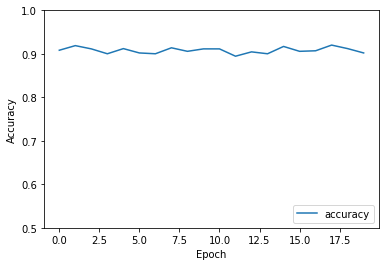

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)